# Predict Blood Donation for Future Expectancy

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Loading the blood donations data

In [3]:
df = pd.read_csv('C:\\Users\\Lenovo\\Desktop\\New folder\\transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


### Inspecting transfusion DataFrame

In [4]:
df.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [5]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
#checking null values
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

### Creating target column

In [9]:
df = df.rename(columns={'whether he/she donated blood in March 2007':'Target'})

### Checking target incidence

In [10]:
df['Target'].value_counts()

0    570
1    178
Name: Target, dtype: int64

 ### Exploratory Data Analysis

### Probability Distribution Curves

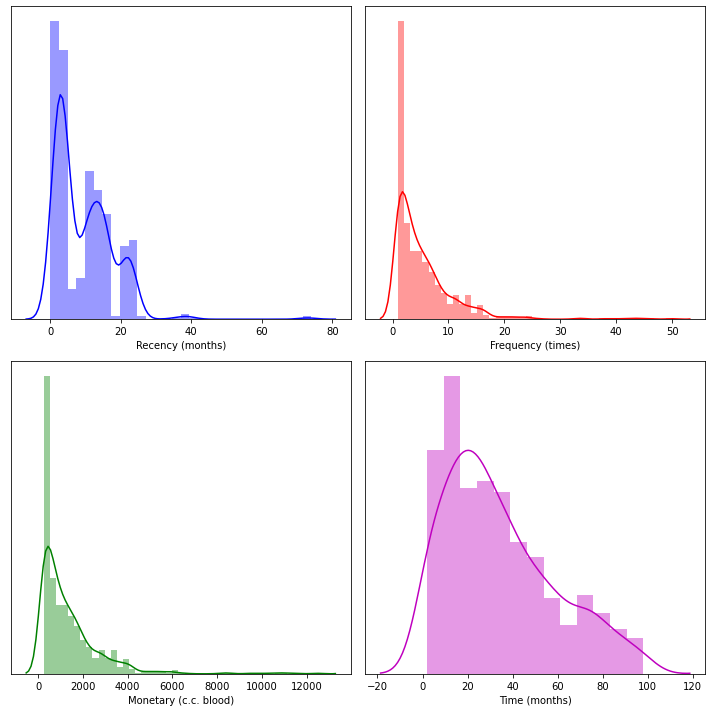

In [11]:
f, axes = plt.subplots(2,2, figsize=(10, 10))
sns.distplot(df['Recency (months)'], color="b", ax=axes[0, 0])
sns.distplot(df['Frequency (times)'], color="r", ax=axes[0, 1])
sns.distplot(df['Monetary (c.c. blood)'], color="g", ax=axes[1, 0])
sns.distplot(df['Time (months)'], color="m", ax=axes[1, 1])
plt.setp(axes,yticks=[])
plt.tight_layout()

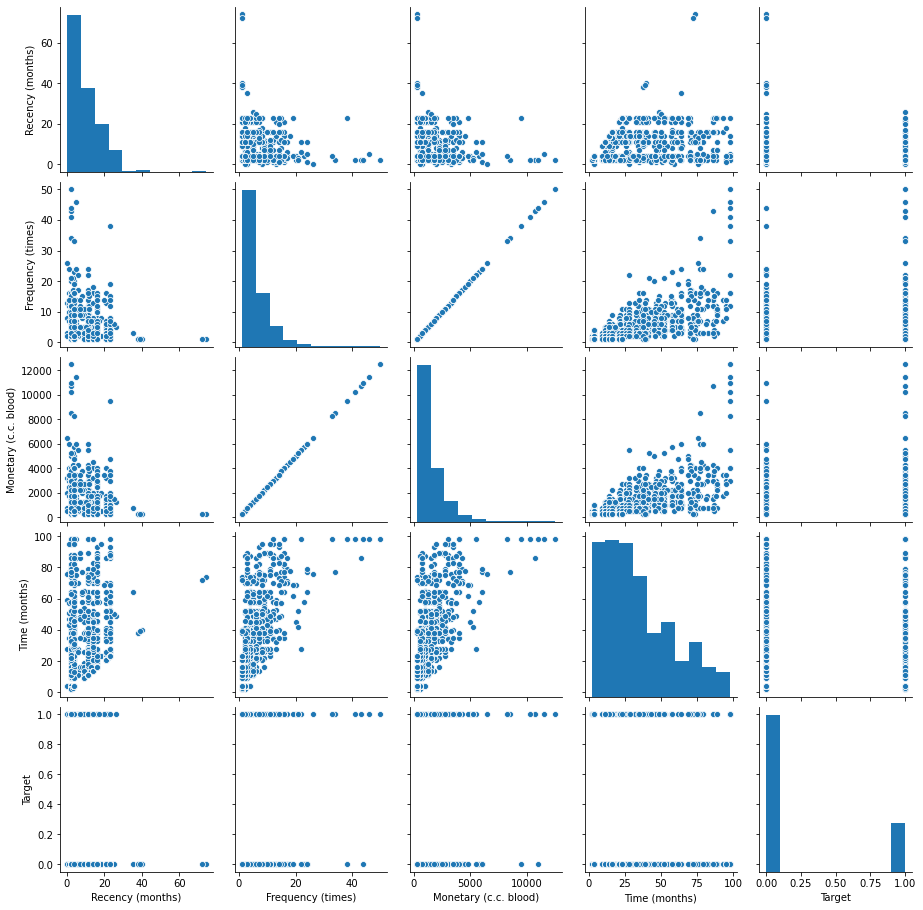

In [12]:
sns.pairplot(df)

### Correlation Between Features

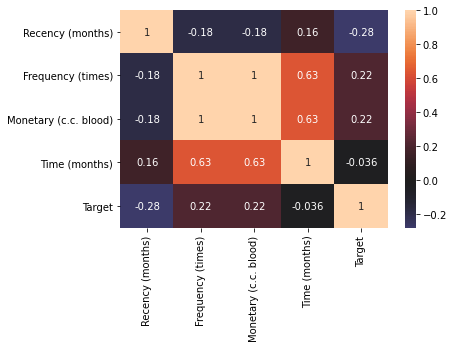

In [13]:
sns.heatmap(df.corr(), center = 0, annot = True)

### Splitting transfusion into train and test datasets

In [14]:
X = df.drop(columns='Target')
y = df.Target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=df.Target)
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
132,2,2,500,10
294,11,5,1250,35
522,4,13,3250,39
291,16,12,3000,50
106,0,8,2000,59


### Selecting model using TPOT

In [16]:
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=1,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

C:\Users\Lenovo\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: 0.740869179713229
Generation 2 - Current best internal CV score: 0.7420690542167971
Generation 3 - Current best internal CV score: 0.7438028147056875
Generation 4 - Current best internal CV score: 0.7457258916287643
Generation 5 - Current best internal CV score: 0.7457258916287643
Best pipeline: DecisionTreeClassifier(MinMaxScaler(input_matrix), criterion=gini, max_depth=6, min_samples_leaf=20, min_samples_split=12)

AUC score: 0.7474

Best pipeline steps:
1. MinMaxScaler()
2. DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, min_samples_split=12,
                       random_state=1)


### Checking the variance

In [17]:
X_train.var().round(2)

Recency (months)              62.28
Frequency (times)             33.80
Monetary (c.c. blood)    2112296.28
Time (months)                607.19
dtype: float64

### Log normalization

In [18]:
# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Specify which column to normalize
col_to_normalize = 'Monetary (c.c. blood)'

# Log normalization
for df_ in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_['monetary_log'] = np.log(df_[col_to_normalize])
    # Drop the original column
    df_.drop(columns=col_to_normalize, inplace=True)

# Check the variance for X_train_normed
X_train_normed.var().round(3)

Recency (months)      62.281
Frequency (times)     33.797
Time (months)        607.188
monetary_log           0.850
dtype: float64

### Feature Importance

In [19]:
import xgboost as xgb
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

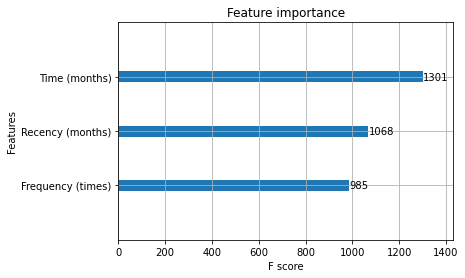

In [20]:
xgb.plot_importance(model_xgb)

In [21]:
#without log transformation we can see that time is not at all a important feature.
#so log transformation is must as we can see through variance function also.
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X_train, y_train)

In [22]:
f_test_df = pd.DataFrame({'Feature':X.columns,
                          'F statistic':f_stat,
                          'p value':f_p_value.round(4)})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
0,Recency (months),46.977265,0.0000
1,Frequency (times),23.608148,0.0000
2,Monetary (c.c. blood),23.608148,0.0000
3,Time (months),0.373632,0.5413


### Training the linear regression model

In [23]:
# Importing modules
from sklearn import linear_model

# Instantiate LogisticRegression
logreg = linear_model.LogisticRegression(solver='liblinear',random_state=1)

# Train the model
model = logreg.fit(X_train_normed, y_train)

# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7860
